<a href="https://colab.research.google.com/github/JakubDemeszko/ML_Course/blob/main/ML/sci_kit04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn

In [ ]:
# Regresja sluzy do przewidywania zmiennej ciaglej
# Regresja liniowa w modelu R2

import numpy as np
X = np.arange(0,50,0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1,1)

print('Rozmiar X:', X.shape)
print('Rozmiar Y:', y.shape)

Rozmiar X: (100, 1)
Rozmiar Y: (100,)


In [ ]:
# Dzielenie modelu na model treningowy, testowy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

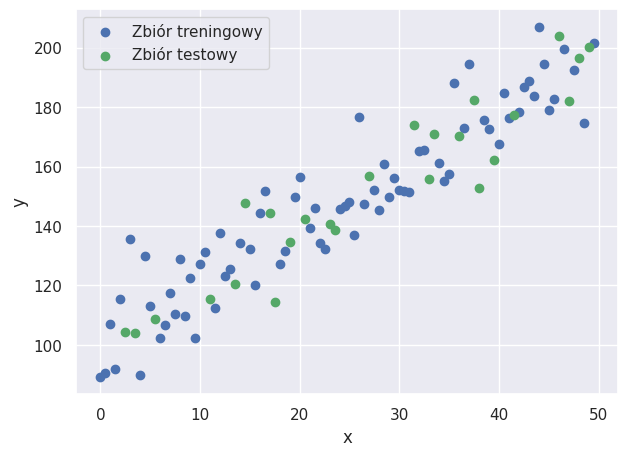

In [ ]:
# Tworzenie wizualizacji podzialu zbioru testowego i treningowego
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize = (7,5))
plt.scatter(X_train, y_train, c = 'b', label = 'Zbiór treningowy')
plt.scatter(X_test, y_test, c = 'g', label = 'Zbiór testowy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
# Trening modelu, wrzucenie dla modelu danych treningowych, otrzymanie
# wskaznika + wartosci do rowniania
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.91928135]
101.30947948167525


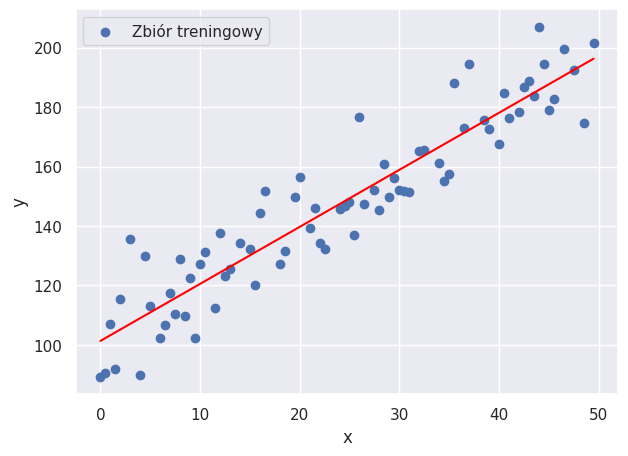

In [ ]:
# Wizualizacja zbioru treningowego i modelu
plt.figure(figsize=(7,5,))
plt.scatter(X_train, y_train, c = 'b', label = 'Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X , c = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

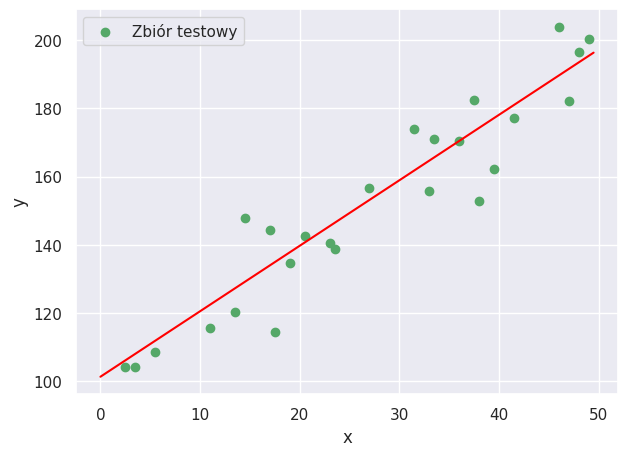

In [ ]:
# Wizualizacja modelu do testu - wrzucenie do y_pred danych X testowych
y_pred = lin_reg.predict(X_test)
plt.figure(figsize = (7,5))
plt.scatter(X_test, y_test, c = 'g', label = 'Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X , c = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
# Ocena modelu, ktory zwraca wspolczynnik determinacji
# Model liniowy lepiej pasuje do danych, ktore wlasnie sa liniowe
lin_reg.score(X_test, y_test)

0.8870395368542047

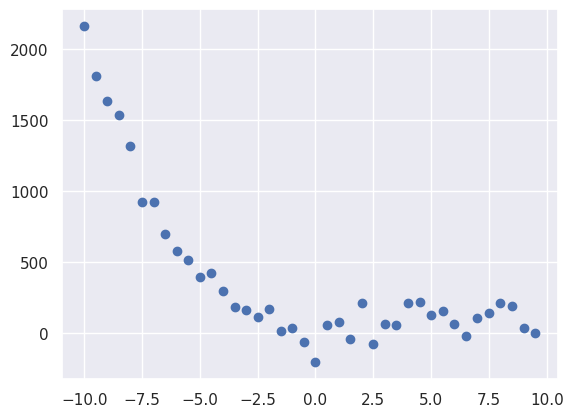

In [ ]:
# Regresja wielomianowa - do zastosowania gdy dane nie maja charakteru liniowosci
np.random.seed(0)
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40,1)
_ = plt.scatter(X, y)

0.5398062344255777

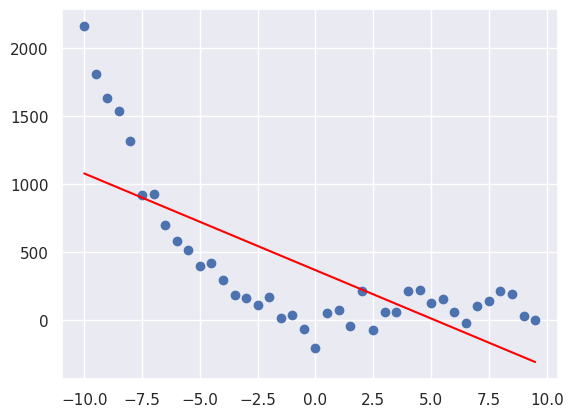

In [ ]:
# Zastosowanie regresji liniowej do powyzszych danych - score jest jednak niski
regressor = LinearRegression()
regressor.fit(X,y)
y_pred = regressor.predict(X)
plt.scatter(X, y)
_ = plt.plot(X, y_pred, c = 'red')
from sklearn.metrics import r2_score
r2_score(y, y_pred)

In [ ]:
# Zwiekszenie zlozonosci modelu
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

0.9000601519884677

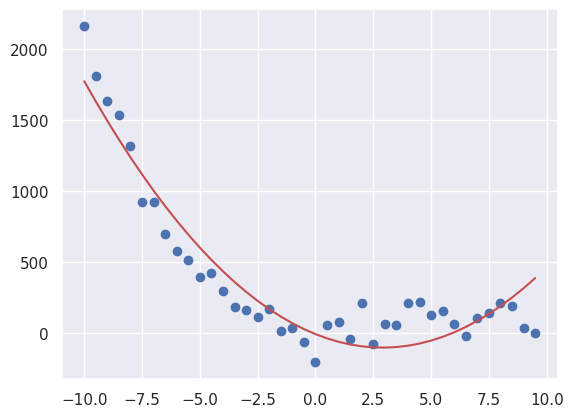

In [ ]:
# Dopasowanie modelu
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)
y_pred = regressor_poly.predict(X_poly)
plt.scatter(X, y)
_ = plt.plot(X, y_pred, c = 'r')
r2_score(y, y_pred)

In [ ]:
# Tworzenie dodatkowej cechy wielomianu
np.set_printoptions(suppress=True)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

0.9793138557357745

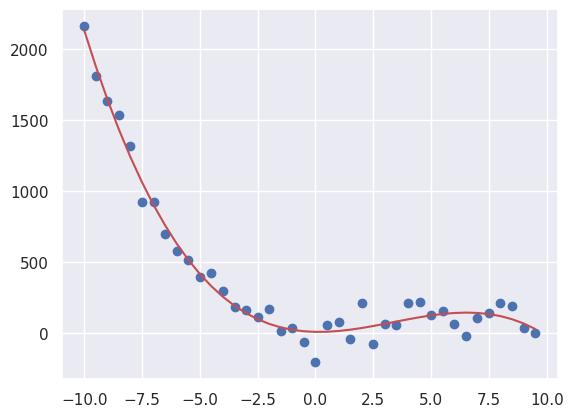

In [ ]:
# Dopasowanie modelu z dodatkowym stopniem

# Dopasowanie modelu
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)
y_pred = regressor_poly.predict(X_poly)
plt.scatter(X, y)
_ = plt.plot(X, y_pred, c = 'r')
r2_score(y, y_pred)